# Redes Neuronales

José Julián Camacho Hernández

Leonardo Guillén Fernández

In [53]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## I Parte

In [43]:
# Cargar el set de datos MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range of 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

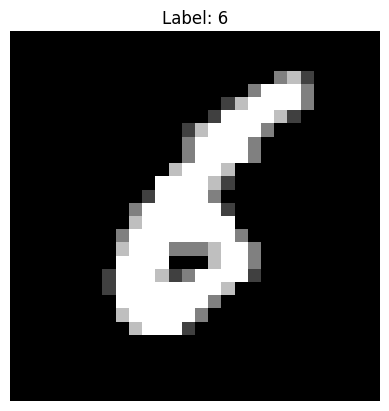

In [21]:
# Seleccionar dato random del dataset
index = np.random.randint(0, len(X_train))
image = X_train[index]

# Visualizar la imagen
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()

In [55]:
#=== Feature Engineering ===#

# Reshape para pasarlas a 1D
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Estandarización de los datos
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = scaler.transform(X_train)
X_train = scaled_data

In [29]:
class Perceptron_Multicapa:
    def __init__(self, capas, alpha=0.1):
        self.capas = capas
        self.alpha = alpha
        self.bias = []
        self.pesos = []
        for i in range(0, len(capas) - 1):
            # Inicializar los pesos y bias de cada capa
            peso = np.random.randn(capas[i], capas[i+1])
            self.pesos.append(peso)
            bias = np.random.randn(capas[i+1])
            self.bias.append(bias)

    def activacion(self, x):
        # Función de activación sigmoide
        return 1.0 / (1 + np.exp(-x))

    def activacion_derivada(self, x):
        # Derivada de la función de activación sigmoide
        return x * (1 - x)

    def feedforward(self, X):
        # Calcular la salida de cada capa
        capa_activacion = [X]
        for i in range(0, len(self.capas) - 1):
            x = np.dot(capa_activacion[i], self.pesos[i]) + self.bias[i]
            y = self.activacion(x)
            capa_activacion.append(y)
        return capa_activacion

    def backpropagation(self, X, y, capa_activacion):
        # Calcular el error de la capa de salida
        error = capa_activacion[-1] - y
        delta = error * self.activacion_derivada(capa_activacion[-1])

        # Propagar el error hacia atrás a través de la red neuronal
        for i in reversed(range(0, len(self.capas) - 1)):
            activacion_actual = capa_activacion[i]
            activacion_anterior = capa_activacion[i-1] if i > 0 else X
            d_peso = np.outer(activacion_actual, delta)
            d_bias = delta
            self.pesos[i] -= self.alpha * d_peso
            self.bias[i] -= self.alpha * d_bias
            delta = np.dot(delta, self.pesos[i].T) * self.activacion_derivada(activacion_actual)

    def entrenar(self, X, y, epochs):
        for epoch in range(0, epochs):
            for i in range(0, len(X)):
                # Feedforward
                capa_activacion = self.feedforward(X[i])

                # Backpropagation
                self.backpropagation(X[i], y[i], capa_activacion)

    def predecir(self, X):
        # Obtener la salida de la última capa
        capa_activacion = self.feedforward(X)
        return capa_activacion[-1]
    

In [48]:
def computeMetrics(y_test, y_pred, training_time):
    acc = accuracy_score(y_test, y_pred)                        # Calcular la exactitud
    f1 = f1_score(y_test, y_pred, average='macro')              # Calcular F1 score
    rec = recall_score(y_test, y_pred, average='macro')         # Calcular el recall
    prec = precision_score(y_test, y_pred, average='macro')     # Calcular la precisión
    metrics = {"Accuracy":acc, "Precision":prec, "Recall":rec, "F1 Score":f1, "Tiempo de entrenamiento [s]":training_time}
    df = pd.DataFrame(metrics, index = [0])
    display(df)

In [62]:
# Crear y entrenar el perceptrón multicapa
perceptron = Perceptron_Multicapa(capas=[784, 128, 10], alpha=0.15)

#Tomar tiempo de entrenamiento
start_time = time.time()
perceptron.entrenar(X_train, np.eye(10)[y_train], epochs=15)
end_time = time.time()
time_taken = end_time - start_time

# Hacer predicciones sobre el conjunto de prueba
predicciones = []
for i in range(len(X_test)):
    prediccion = perceptron.predecir(X_test[i])
    prediccion_clase = np.argmax(prediccion)
    predicciones.append(prediccion_clase)

# Calcular la precisión de las predicciones
computeMetrics(y_test, predicciones, time_taken)

/tmp/ipykernel_8283/3650226470.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))
/home/jose/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1 Score,Tiempo de entrenamiento [s]
0,0.7432,0.765724,0.752851,0.734011,641.11168


## II Parte